In [1]:
import tensorflow as tf



In [2]:
tf.version

<module 'tensorflow._api.v2.version' from 'C:\\Users\\profe\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [3]:
from keras.models import Model
from keras.layers import Input,Conv3D,MaxPooling3D,UpSampling3D,concatenate,Conv3DTranspose,Dropout
import numpy as np
import keras
import tensorflow as tf
from keras import backend as k
from keras.optimizers import Adam

In [4]:
def simple_unet_model(n_classes,IMG_HEIGHT,IMG_WIDTH,IMG_DEPTH,IMG_CHANNELS=1):
    inputs=Input((IMG_HEIGHT,IMG_WIDTH,IMG_DEPTH,IMG_CHANNELS))
    
    
    #convolution network
    c1=Conv3D(16,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(inputs)
    c1=Dropout(0.1)(c1)
    c1=Conv3D(16,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(c1)
    p1=MaxPooling3D((2,2,2))(c1)
    
    #c2=Conv3D(32,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(p1)
   # c2=Dropout(0.1)(c2)
   # c2=Conv3D(32,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(c2)
    #p2=MaxPooling3D((2,2,2))(c2)
    
    #c3=Conv3D(64,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(p2)
    #c3=Dropout(0.1)(c3)
    #c3=Conv3D(64,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(c3)
    #p3=MaxPooling3D((2,2,2))(c3)
    """
    c4=Conv3D(128,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(p3)
    c4=Dropout(0.1)(c4)
    c4=Conv3D(128,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(c4)
    p4=MaxPooling3D((2,2,2))(c4)
    
    c5=Conv3D(256,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(p4)
    c5=Dropout(0.3)(c5)
    c5=Conv3D(256,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(c5)
    """
    #Expansive path
    """
    u6=Conv3DTranspose(128,(2,2,2),strides=(2,2,2),padding='same')(c5)
    u6=concatenate([u6,c4])
    c6=Conv3D(128,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(u6)
    c6=Dropout(0.1)(c6)
    c6=Conv3D(128,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(c6)
    
    u7=Conv3DTranspose(64,(2,2,2),strides=(2,2,2),padding='same')(c6)
    u7=concatenate([u7,c3])
    c7=Conv3D(64,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(u7)
    c7=Dropout(0.2)(c7)
    c7=Conv3D(64,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(c7)
    """
    #u8=Conv3DTranspose(32,(2,2,2),strides=(2,2,2),padding='same')(c2)
    #u8=concatenate([u8,c2])
    #c8=Conv3D(32,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(u8)
    #c8=Dropout(0.2)(c8)
    #c8=Conv3D(32,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(c8)
    
    u9=Conv3DTranspose(16,(2,2,2),strides=(2,2,2),padding='same')(p1)
    u9=concatenate([u9,c1])
    c9=Conv3D(16,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(u9)
    c9=Dropout(0.2)(c9)
    c9=Conv3D(16,(3,3,3),activation='relu',kernel_initializer='he_uniform',padding='same')(c9)
    
    outputs=Conv3D(n_classes,(1,1,1),activation='softmax')(c9)
    #decoder_outputs = Lambda(lambda x: K.cast(x, 'float32'), name='change_to_float')(decoder_outputs)
    
    model=Model(inputs=[inputs],outputs=[outputs])
    
    model.summary()
    
    return model



In [5]:
import segmentation_models_3D as sm

Segmentation Models: using `tf.keras` framework.


In [6]:
wt0,wt1,wt2,wt3,wt4=0.21,65.64,6.43,38.57,19.37

In [7]:
dice_loss=sm.losses.DiceLoss(class_weights=np.array([wt0,wt1,wt2,wt3,wt4]))
focal_loss=sm.losses.CategoricalFocalLoss()
total_loss=dice_loss+(1*focal_loss)

metrics=['accuracy',sm.metrics.IOUScore(threshold=0.5)]

LR=0.0001
optim=keras.optimizers.Adam(LR)

In [8]:
model=simple_unet_model(IMG_HEIGHT=128,
          IMG_WIDTH=128,
          IMG_DEPTH=128,              
          IMG_CHANNELS=3,
          n_classes=5)

model.compile(optimizer=optim,loss=total_loss,metrics=metrics)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

In [9]:

#


In [10]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

In [11]:
print(model.input_shape)

(None, 128, 128, 128, 3)


In [12]:
print(model.output_shape)

(None, 128, 128, 128, 5)


(128, 128, 128, 5)
(128, 128, 128, 3)


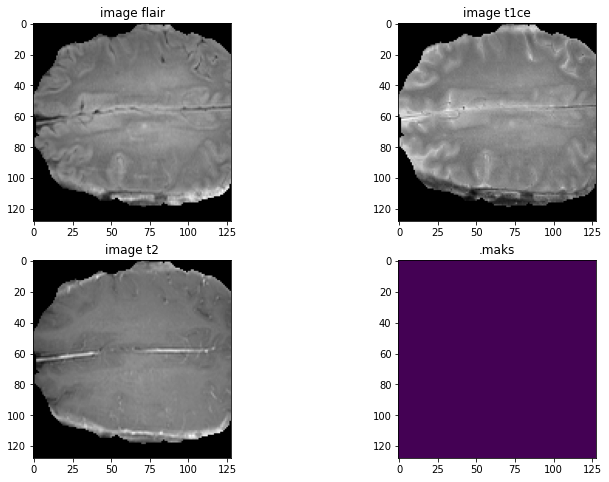

[0. 1.]
(128, 128, 128, 5)
(128, 128, 128, 3)
0
(128, 128, 128, 3)
(128, 128, 128, 5)


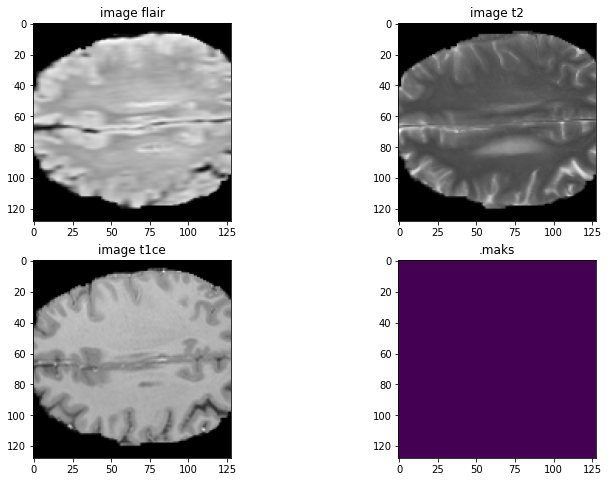

(128, 128, 128, 5)
float32
[0. 1.]
0
(128, 128, 128, 3)
(128, 128, 128, 5)


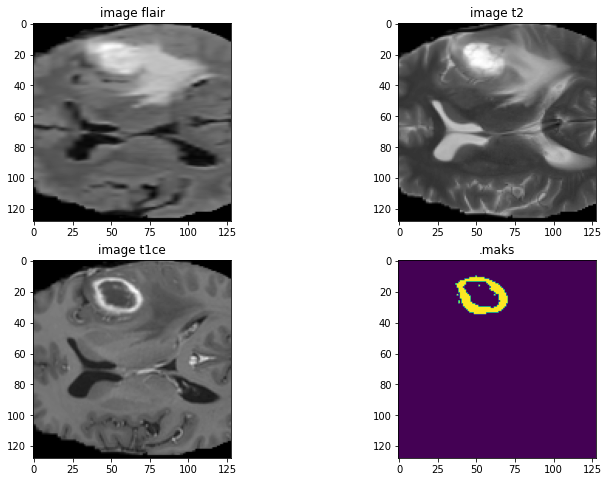

1
(128, 128, 128, 3)
(128, 128, 128, 5)


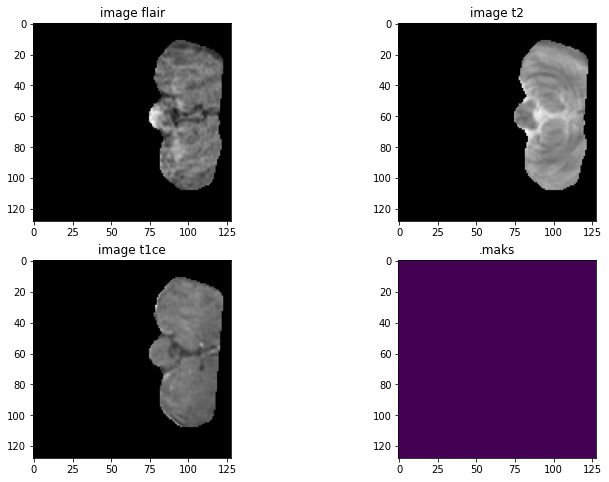

In [13]:
%run Train_data.ipynb import img_datagen

In [17]:
#here we all are ready to train model on data
practice_train_test1=model.fit(img_datagen,steps_per_epoch=steps_per_epoch,
                              epochs=10,verbose=1,
                              validation_data=val_img_datagen,
                              validation_steps=val_steps_per_epoch)

NameError: name 'steps_per_epoch' is not defined